In [54]:
import io
import re
import tkinter as tk
from tkinter import filedialog
from datetime import datetime
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

In [55]:
flower_graph = {1: [2, 6],
            2: [1, 3],
            3: [2, 4, 7],
            4: [3, 5],
            5: [4, 8],
            6: [1, 9, 17],
            7: [3, 9, 10],
            8: [5, 10, 11],
            9: [6, 7, 12],
            10: [7, 8, 13],
            11: [8, 14],
            12: [9, 15, 19],
            13: [10, 15, 16],
            14: [11, 16],
            15: [12, 13, 22],
            16: [13, 14, 24],
            17: [6, 18],
            18: [17, 19],
            19: [12, 18, 20],
            20: [19, 21],
            21: [20, 22],
            22: [15, 21, 23],
            23: [22, 24],
            24: [16, 23]}

In [56]:
node_pos = {
        1: (0, 5), 2: (1, 6), 3: (2, 5), 4: (3, 6), 5: (4, 5),
        6: (0, 4), 7: (2, 4), 8: (4, 4), 9: (1, 3), 10: (3, 3), 11: (5, 3),
        12: (1, 2), 13: (3, 2), 14: (5, 2), 15: (2, 1), 16: (4, 1), 17: (-1, 3),
        18: (-1, 2), 19: (0, 1), 20: (0, 0), 21: (1, -1), 22: (2, 0), 23: (3,-1), 24: (4,0)
    }

In [57]:
def hexagonal_lattice_layout(G):
    layout = {}
    
    node_pos = {
        1: (0, 5), 2: (1, 6), 3: (2, 5), 4: (3, 6), 5: (4, 5),
        6: (0, 4), 7: (2, 4), 8: (4, 4), 9: (1, 3), 10: (3, 3), 11: (5, 3),
        12: (1, 2), 13: (3, 2), 14: (5, 2), 15: (2, 1), 16: (4, 1), 17: (-1, 3),
        18: (-1, 2), 19: (0, 1), 20: (0, 0), 21: (1, -1), 22: (2, 0), 23: (3,-1), 24: (4,0)
    }
    
    for node in G.nodes:
        layout[node] = node_pos[node]
        
    print(layout)
    
    return layout

In [58]:
def maze_graph():
    
    flower_graph = {1: [2, 6],
            2: [1, 3],
            3: [2, 4, 7],
            4: [3, 5],
            5: [4, 8],
            6: [1, 9, 17],
            7: [3, 9, 10],
            8: [5, 10, 11],
            9: [6, 7, 12],
            10: [7, 8, 13],
            11: [8, 14],
            12: [9, 15, 19],
            13: [10, 15, 16],
            14: [11, 16],
            15: [12, 13, 22],
            16: [13, 14, 24],
            17: [6, 18],
            18: [17, 19],
            19: [12, 18, 20],
            20: [19, 21],
            21: [20, 22],
            22: [15, 21, 23],
            23: [22, 24],
            24: [16, 23]}

    # Create a graph from the dictionary
    G = nx.Graph(flower_graph)
    pos = hexagonal_lattice_layout(G)

    return G, pos

In [59]:
def path_graph(inputfile):
    '''
    Description: Generates Path Graph based on original path the mouse takes
    
    Returns: Two lists which contain graph info and node info
    '''
    with open(inputfile) as file:
        lines = file.read().splitlines(keepends = False)
        for line in lines:
            if "Trial 6:" in line:
                path = line.split(': ')[1]
                print(path)
                pg = nx.DiGraph()
                nl = []
                for node in path.split(','):
                    print(node)
                    pg.add_node(int(node))
                    nl.append(int(node))
                    for num, edge_points in enumerate(nl):
                        if num:
                            pg.add_edge(nl[num - 1], nl[num])
            
    return pg, nl


In [60]:
G, pos = maze_graph()

{1: (0, 5), 2: (1, 6), 3: (2, 5), 4: (3, 6), 5: (4, 5), 6: (0, 4), 7: (2, 4), 8: (4, 4), 9: (1, 3), 10: (3, 3), 11: (5, 3), 12: (1, 2), 13: (3, 2), 14: (5, 2), 15: (2, 1), 16: (4, 1), 17: (-1, 3), 18: (-1, 2), 19: (0, 1), 20: (0, 0), 21: (1, -1), 22: (2, 0), 23: (3, -1), 24: (4, 0)}


In [61]:
H, nl = path_graph('nodetest.txt')

5,4,3,2,1,6,17,18,19,20,21
5
4
3
2
1
6
17
18
19
20
21


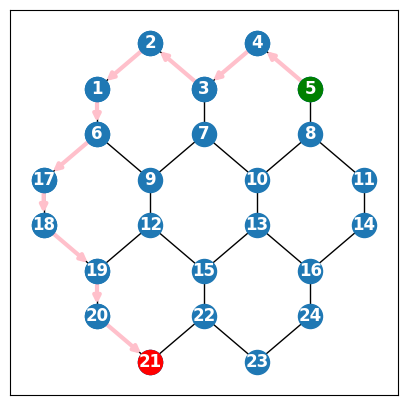

In [62]:
plt.figure(figsize=(5, 5))
nx.draw_networkx_nodes(G, pos)
nx.draw_networkx_edges(G, pos, width=1)
node_labels = {node: node for node in G.nodes()}
nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=12, font_color="white", font_weight="bold")


nodelist = [int(node) for node in nl]

nx.draw_networkx_nodes(H, pos, nodelist=nodelist)
nx.draw_networkx_edges(H, pos, nodelist=nodelist, width = 3, edge_color = 'pink')
nx.draw_networkx_nodes(H, pos, nodelist = [nl[0]], node_color = 'g')
nx.draw_networkx_nodes(H, pos, nodelist = [nl[-1]], node_color = 'r')
plt.show()